### **Importing All Necessary Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle
import joblib
import seaborn as sns
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### **Loading Dataset Using Pandas**

In [2]:
path = "/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df.head(2)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
df.tail(2)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
225743,61323,48,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,250000.0000,41666.66667,48.0,0.0,48,48,48,48.0,0.0,48,48,0,0.0,0.0,0,0,0,0,0,0,40,0,41666.66667,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,4719,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225744,61326,68,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,176470.5882,29411.76471,68.0,0.0,68,68,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,14705.88235,14705.88235,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,13140,64240,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [7]:
df.keys()

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [8]:
print("Number Of target/Label Column and there Counts")
df[' Label'].value_counts()

Number Of target/Label Column and there Counts


 Label
DDoS      128027
BENIGN     97718
Name: count, dtype: int64

In [9]:
df.shape

(225745, 79)

In [10]:
print("Columns with Null values:")
[features for features in df.columns if df[features].isnull().sum()>0]

Columns with Null values:


['Flow Bytes/s']

In [11]:
print("Columns with infinite values:")
[feature for feature in df.columns if df[feature].isin([np.inf, -np.inf]).any()]

Columns with infinite values:


['Flow Bytes/s', ' Flow Packets/s']

### Replacing infinite values with NaN in DataFrame

In [12]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

### Dropping NaN values

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(225711, 79)

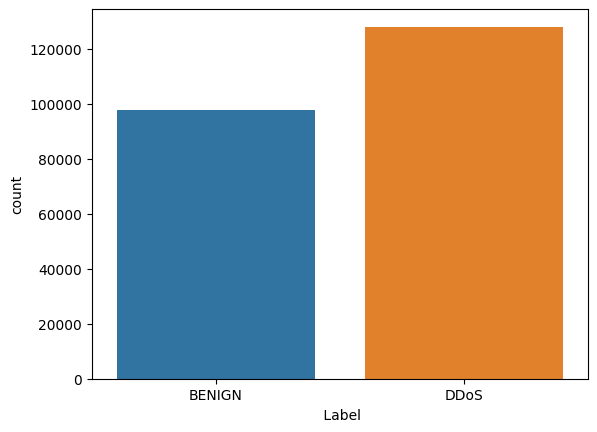

In [15]:
sns.countplot(x=' Label', data=df)
plt.show()

### **Manually Labelizing The Target Column**

In [16]:
df[' Label'] = df[' Label'].map({'BENIGN': 0, 'DDoS': 1})

### **Splitting Dataset Into Testing and Training**

In [17]:
predictorNames = [' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count',
       ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count',
       ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count',
       ' ECE Flag Count', ' Down/Up Ratio', ' Average Packet Size',
       ' Avg Fwd Segment Size', ' Avg Bwd Segment Size',
       ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk',
       ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', ' Subflow Fwd Bytes',
       ' Subflow Bwd Packets', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' act_data_pkt_fwd',
       ' min_seg_size_forward', 'Active Mean', ' Active Std', ' Active Max',
       ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max', ' Idle Min']

In [18]:
predictors = df[predictorNames]

In [19]:
response = df[' Label']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2, random_state=42)

### **Ensemble Learning with Random Forest Classifier and Bagging**

****Now, let's implement ensemble learning using a Random Forest Classifier (RFC) and a Bagging Classifier. We'll create an RFC with 100 estimators and a maximum depth of 5, and then use it as the base estimator for the Bagging Classifier. The Bagging Classifier will consist of 100 base estimators, each trained on a random subset of the data (80% of samples and features).****

![Image Alt Text](bagging_display.png)

In [21]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5)

In [22]:
model = BaggingClassifier(estimator=rfc, n_estimators=100, max_samples=0.8, max_features=0.8)

In [23]:
model.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(max_depth=5),
                  max_features=0.8, max_samples=0.8, n_estimators=100)

### **Evaluating Model Performance**

In [24]:
y_pred =model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
print("Accuracy:", accuracy*100)
print('Recall:', recall*100)
print('Precision:', precision*100)
print('F1 Score:', f1*100)
print('MCC:', mcc*100)

Accuracy: 99.91582305119287
Recall: 99.85227802830042
Precision: 100.0
F1 Score: 99.92608441937367
MCC: 99.82848494848997


### **Heatmap for the confusion matrix displayed**

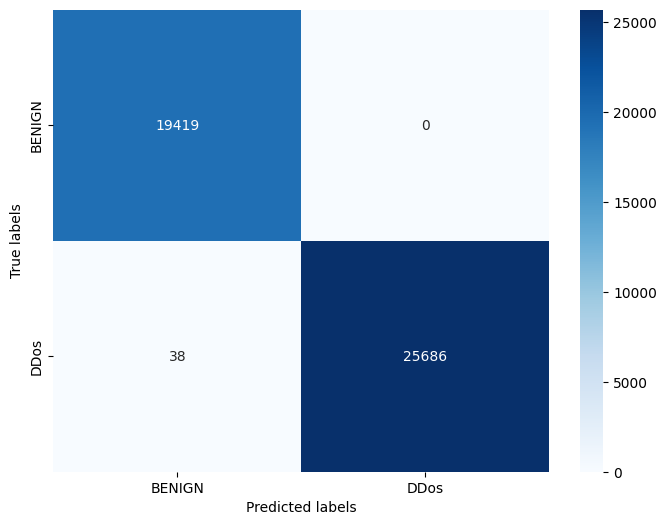

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['BENIGN', 'DDos'], yticklabels=['BENIGN', 'DDos'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### **Visualization of Model Performance**

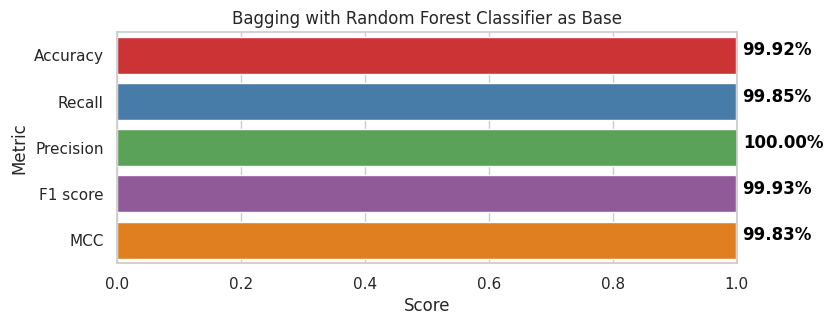

In [26]:
labels = ['Accuracy', 'Recall', 'Precision', 'F1 score', 'MCC']
scores = [accuracy,recall, precision,f1,mcc]
sns.set(style='whitegrid')
sns.set_color_codes('pastel')
palette = sns.color_palette('Set1', n_colors=len(set(labels)))

fig, ax = plt.subplots(figsize=(8, 3))
sns.barplot(x=scores, y=labels, palette=palette)

for i, v in enumerate(scores):
    ax.text(v+0.01, i, f'{v*100:.2f}%', color='black', fontweight='bold')

ax.set_xlim(0, 1)
ax.set_xlabel('Score')
ax.set_ylabel('Metric')
ax.set_title('Bagging with Random Forest Classifier as Base')

plt.show()

## **Saving The Model**

In [27]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

joblib.dump(model, 'model.joblib')

['model.joblib']